In [5]:
import pandas as pd

red_train = pd.read_csv("red_train.csv")
red_test = pd.read_csv("red_test.csv")
red_valid = pd.read_csv("red_valid.csv")

# Question 1a

In [76]:
print "red_train: %i"%(red_train.index.size)
print "red_test: %i"%(red_test.index.size)
print "red_valid: %i"%(red_valid.index.size)

red_train: 895
red_test: 480
red_valid: 224


# Question 1b

In [22]:
print "Number of features: %i"%(red_train.columns.size - 1) # Subtract 1 because 1 column is the independent var

Number of features: 11


# Question 1c

In [78]:
print "average alcohol: %f"%(red_train.alcohol.mean())
print "average pH: %f"%(red_train.pH.mean())

average alcohol: 10.397952
average pH: 3.309542


# Question 2a

In [52]:
from sklearn.tree import DecisionTreeClassifier
import re as regex

tree = DecisionTreeClassifier()
train_X = red_train.drop(['quality'], axis=1)
train_y = red_train.quality
tree.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Question 2b

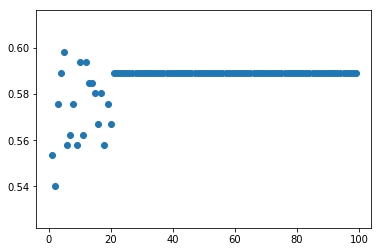

In [79]:
max_depths = range(1, 100)
accuracies = []

valid_X = red_valid.drop(['quality'], axis=1)
valid_y = red_valid.quality

for i in max_depths:
    tree = DecisionTreeClassifier(max_depth=i, random_state=101)
    tree.fit(train_X, train_y)
    accuracies.append(tree.score(valid_X, valid_y))

import matplotlib.pyplot as plot
plot.scatter(max_depths, accuracies)
plot.show()

# Question 2c

In [84]:
test_X = red_test.drop(['quality'], axis=1)
test_y = red_test.quality

max_accuracy = max(accuracies)
best_max_depth = max_depths[accuracies.index(max_accuracy)]

DecisionTreeClassifier(max_depth=best_max_depth).fit(train_X, train_y).score(test_X, test_y)

0.5666666666666667